In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (silhouette_score,
                             accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay
                             )

import scipy.cluster.hierarchy as shc

In [34]:
data = pd.read_csv("sales_data_sample.csv", encoding = 'unicode_escape')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
ORDERLINENUMBER,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
QTR_ID,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
MONTH_ID,2823.0,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
YEAR_ID,2823.0,2003.815090,0.699670,2003.00,2003.00,2004.0,2004.0,2005.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [37]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [38]:
df=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'MONTH_ID']
data.drop(df,axis=1,inplace=True)

In [39]:
data['PRODUCTINITIAL'] = data['PRODUCTCODE'].str[:3]
data.drop('PRODUCTCODE',axis=1,inplace=True)

In [40]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,2004,Ships,54,Euro Shopping Channel,Spain,Small,S72
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Finland,Medium,S72
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,2005,Ships,54,Euro Shopping Channel,Spain,Medium,S72
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,2005,Ships,54,Alpha Cognac,France,Small,S72


In [41]:
data.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
CUSTOMERNAME         92
COUNTRY              19
DEALSIZE              3
PRODUCTINITIAL        8
dtype: int64

In [42]:
data['YEAR_ID'].unique()

array([2003, 2004, 2005])

# RFM Analysis

In [43]:
col =['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM = data[col]
RFM

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27
...,...,...,...,...
2818,Euro Shopping Channel,10350,12/2/2004 0:00,2244.40
2819,"Oulu Toy Supplies, Inc.",10373,1/31/2005 0:00,3978.51
2820,Euro Shopping Channel,10386,3/1/2005 0:00,5417.57
2821,Alpha Cognac,10397,3/28/2005 0:00,2116.16


In [44]:
RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2200\493735993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')


In [45]:
RFM

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27
...,...,...,...,...
2818,Euro Shopping Channel,10350,2004-12-02,2244.40
2819,"Oulu Toy Supplies, Inc.",10373,2005-01-31,3978.51
2820,Euro Shopping Channel,10386,2005-03-01,5417.57
2821,Alpha Cognac,10397,2005-03-28,2116.16


In [46]:
import datetime as dt
now = dt.datetime(2005,5,31)
rfm_data = RFM.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days}) 
rfm_data['Frequency'] = RFM.groupby(by=['CUSTOMERNAME'])['ORDERNUMBER'].count()
rfm_data['MonetaryValue'] = RFM.groupby(by='CUSTOMERNAME').agg({'SALES': 'sum'})

In [47]:
rfm_data

,ORDERDATE,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96
...,...,...,...
"Vida Sport, Ltd",274,31,117713.56
Vitachrome Inc.,207,25,88041.26
"Volvo Model Replicas, Co",193,19,75754.88


In [48]:
rfm_data.rename(columns={'ORDERDATE': 'Recency'}, inplace=True)
rfm_data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


In [49]:
r = pd.qcut(rfm_data.Recency, 4, labels = list(range(0,4)))
f = pd.qcut(rfm_data.Frequency, 4, labels = list(range(0,4)))
m = pd.qcut(rfm_data.MonetaryValue, 4, labels = list(range(0,4)))
rfm_data_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
rfm_data_cutted

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",2,3,3
Alpha Cognac,0,1,1
Amica Models & Co.,3,1,2
"Anna's Decorations, Ltd",1,3,3
Atelier graphique,2,0,0
...,...,...,...
"Vida Sport, Ltd",3,2,2
Vitachrome Inc.,2,1,2
"Volvo Model Replicas, Co",2,0,1


In [50]:
rfm_data_raw = rfm_data_cutted.values
rfm_data_raw

array([[2, 3, 3],
       [0, 1, 1],
       [3, 1, 2],
       [1, 3, 3],
       [2, 0, 0],
       [0, 1, 0],
       [1, 3, 3],
       [1, 0, 0],
       [3, 0, 0],
       [0, 2, 2],
       [1, 0, 0],
       [2, 2, 2],
       [3, 0, 0],
       [2, 1, 1],
       [1, 0, 0],
       [3, 0, 0],
       [3, 0, 0],
       [2, 1, 1],
       [2, 1, 0],
       [2, 1, 1],
       [3, 0, 0],
       [3, 1, 2],
       [1, 1, 1],
       [1, 3, 3],
       [2, 2, 3],
       [2, 1, 2],
       [3, 1, 0],
       [0, 3, 3],
       [0, 2, 3],
       [3, 0, 1],
       [3, 0, 0],
       [1, 3, 3],
       [2, 1, 1],
       [0, 3, 3],
       [1, 1, 2],
       [0, 1, 2],
       [1, 0, 0],
       [0, 1, 1],
       [0, 3, 2],
       [2, 2, 2],
       [3, 2, 2],
       [3, 0, 0],
       [0, 3, 3],
       [2, 1, 2],
       [0, 3, 3],
       [2, 3, 3],
       [0, 1, 1],
       [1, 1, 1],
       [3, 2, 2],
       [3, 0, 0],
       [2, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [2, 1, 1],
       [1, 3, 2],
       [0,

In [51]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_data_raw)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])
groups

,number_of_group,inertia
0,1,344.304348
1,2,161.954545
2,3,113.755411
3,4,76.595037
4,5,64.006996
5,6,48.471263
6,7,38.751784
7,8,32.438695
8,9,30.338636
9,10,25.971420


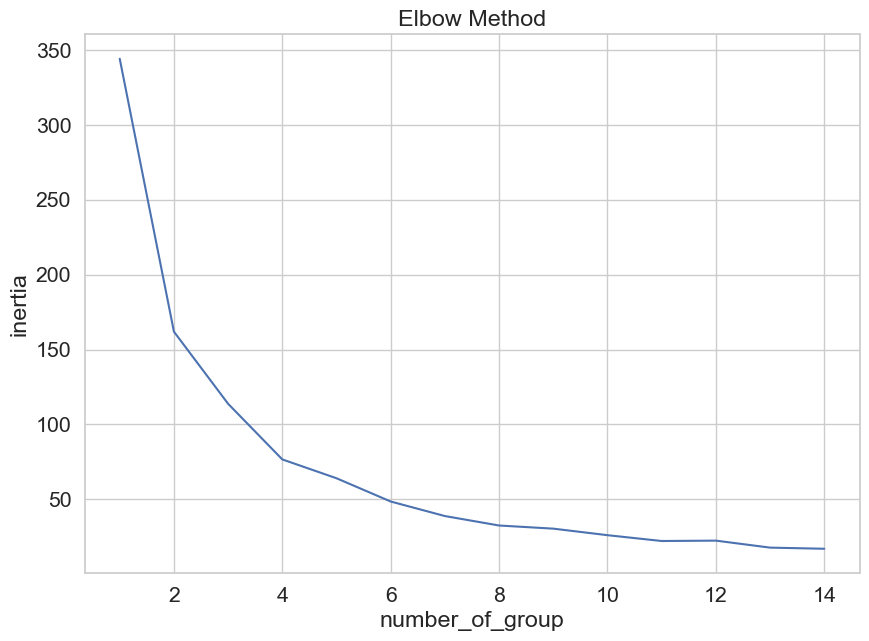

In [52]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia', markers='o').set(title = "Elbow Method")
plt.show()

In [53]:
def plots_model():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    grouped_data = rfm_data.groupby('groups')
  
    for i, (group_name, group_data) in enumerate(grouped_data):
        xs = group_data['Recency']
        ys = group_data['MonetaryValue']
        zs = group_data['Frequency']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label=group_name)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [54]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_data_raw)
rfm_data_cutted['groups'] = groups
rfm_data['groups'] = groups

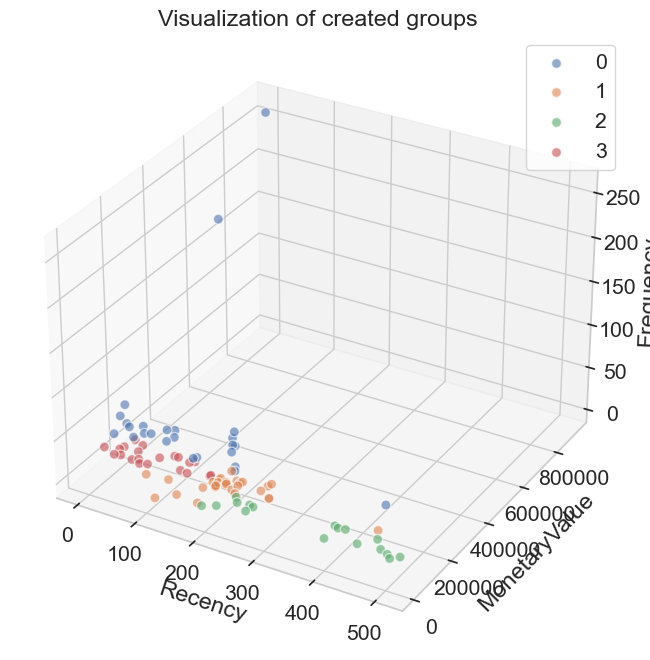

In [55]:
plots_model()

In [56]:
rfm_data.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,1.369565


In [57]:
rfm_data.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,108.160000,55.840000,198543.267200
1,213.172414,22.000000,78778.362759
2,359.176471,14.588235,51764.517059
3,82.666667,25.761905,90689.421905


<Axes: title={'center': 'The sum of the values of individual groups'}, xlabel='groups'>

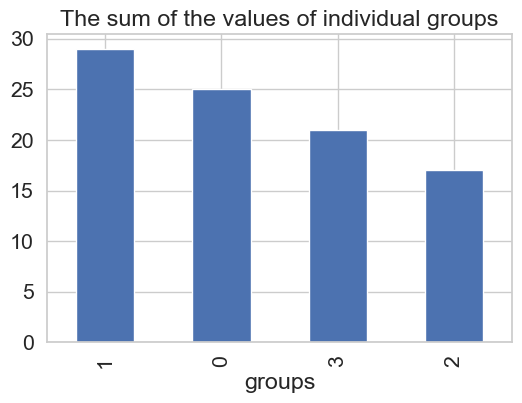

In [58]:
rfm_data.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups')

In [59]:
def name(row):
    segment_mapping = {0: 'departing', 1: 'active', 2: 'inactive'}
    return segment_mapping.get(row, 'new')

rfm_data['SegmentName'] = rfm_data['groups'].apply(name)
rfm_data

,Recency,Frequency,MonetaryValue,groups,SegmentName
CUSTOMERNAME,,,,,
"AV Stores, Co.",195,51,157807.81,0,departing
Alpha Cognac,64,20,70488.44,3,new
Amica Models & Co.,264,26,94117.26,1,active
"Anna's Decorations, Ltd",83,46,153996.13,0,departing
Atelier graphique,187,7,24179.96,2,inactive
...,...,...,...,...,...
"Vida Sport, Ltd",274,31,117713.56,1,active
Vitachrome Inc.,207,25,88041.26,1,active
"Volvo Model Replicas, Co",193,19,75754.88,1,active


* Cluster 0: Moving from the platform
* Cluster 1: Active Customer to the platform
* Cluster 3: Inactive customer
* CLuster 4: New Customer